# Import modules and Functions

## Modules

In [1]:
### Libraries and Modules
%matplotlib inline
import paths

from AMP_class import *
from StateEvolution_class import *
from main import *

/Users/benjaminaubin/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Main - AMP and State Evolution

## Parameters

In [3]:
### Parameters
K = 2 
PW_choice = 'binary' #PW_choice= binary or gaussian
N = 1000 # N=1000 for test (fast) - N=10000 to be very precise
alpha = 1.8

## AMP

#### Run AMP: training on M=alpha*N samples

In [ ]:
obj_AMP = run_AMP(K,PW_choice,N,alpha)

K= 2 PW= binary alpha= 1.8
Start AMP
K= 2 PW= binary alpha= 1.8
Start: Thu May 31 13:39:50 2018
q_AMP=
[0. 0.]
[0. 0.]
Step =  1 

Time ellapsed for the step = 1.2622170448303223
q_AMP=
[0.51080639 0.21563361]
[0.21563361 0.50361096]
difference q = 0.779450369741011
difference What = 31.849919164335297
Step =  2 

Time ellapsed for the step = 1.27669358253479
q_AMP=
[0.48223946 0.16799498]
[0.16799498 0.48151838]
difference q = 0.07643971470686632
difference What = 30.275747107229027
Step =  3 

Time ellapsed for the step = 1.2826249599456787
q_AMP=
[0.49596133 0.24566732]
[0.24566732 0.49010384]
difference q = 0.11103145465603141
difference What = 24.566606848391203
Step =  4 

Time ellapsed for the step = 1.5917072296142578
q_AMP=
[0.46902769 0.24788194]
[0.24788194 0.47291279]
difference q = 0.03210548739260435
difference What = 22.47363705486127
Step =  5 

Time ellapsed for the step = 1.5731220245361328
q_AMP=
[0.45770101 0.26589442]
[0.26589442 0.45792403]
difference q = 0.031652

Time ellapsed for the step = 1.3133511543273926
q_AMP=
[0.43773194 0.28546522]
[0.28546522 0.43578351]
difference q = 0.006360222158311525
difference What = 13.043021979425147
Step =  45 

Time ellapsed for the step = 1.3140869140625
q_AMP=
[0.4361716  0.27448242]
[0.27448242 0.44317886]
difference q = 0.017273383893234892
difference What = 11.930191752186587
Step =  46 

Time ellapsed for the step = 1.3733100891113281
q_AMP=
[0.44217126 0.27716215]
[0.27716215 0.43911467]
difference q = 0.008177742560732002
difference What = 12.209936905529673
Step =  47 

Time ellapsed for the step = 1.2830150127410889
q_AMP=
[0.44344152 0.27986493]
[0.27986493 0.4371212 ]
difference q = 0.004494169449066027
difference What = 11.651560016818264
Step =  48 

Time ellapsed for the step = 1.256864070892334
q_AMP=
[0.43792447 0.27868343]
[0.27868343 0.43776839]
difference q = 0.00580074447431223
difference What = 11.660747871257822
Step =  49 

Time ellapsed for the step = 1.281477928161621
q_AMP=
[0.437

Time ellapsed for the step = 1.477952003479004
q_AMP=
[0.4206494  0.29425642]
[0.29425642 0.43051458]
difference q = 0.03759564099581958
difference What = 18.12254005173989
Step =  89 

Time ellapsed for the step = 1.548388957977295
q_AMP=
[0.41672341 0.29874186]
[0.29874186 0.4222961 ]
difference q = 0.011099331245869048
difference What = 15.17225071354165
Step =  90 

Time ellapsed for the step = 1.401993751525879
q_AMP=
[0.43084514 0.27523177]
[0.27523177 0.42463432]
difference q = 0.0361986115095139
difference What = 17.74359702791327
Step =  91 

Time ellapsed for the step = 1.334779977798462
q_AMP=
[0.41886456 0.29358576]
[0.29358576 0.42593059]
difference q = 0.028617355167511963
difference What = 18.748471535678203
Step =  92 

Time ellapsed for the step = 1.2649078369140625
q_AMP=
[0.41512204 0.2991933 ]
[0.2991933  0.41998018]
difference q = 0.01059729834005351
difference What = 16.099529404225603
Step =  93 

Time ellapsed for the step = 1.3412249088287354
q_AMP=
[0.4232962 

Time ellapsed for the step = 1.3175249099731445
q_AMP=
[0.43859354 0.28168054]
[0.28168054 0.43459373]
difference q = 0.018910705450407732
difference What = 21.321599341003918
Step =  133 

Time ellapsed for the step = 1.271535873413086
q_AMP=
[0.42447236 0.29313553]
[0.29313553 0.42505228]
difference q = 0.023513416109839386
difference What = 19.18738023030312
Step =  134 

Time ellapsed for the step = 1.310049057006836
q_AMP=
[0.43766705 0.27307114]
[0.27307114 0.43335934]
difference q = 0.03237694208602796
difference What = 19.685813102333903
Step =  135 

Time ellapsed for the step = 1.3126330375671387
q_AMP=
[0.42969396 0.28416652]
[0.28416652 0.43255787]
difference q = 0.017618948489492595
difference What = 20.78065929850393
Step =  136 

Time ellapsed for the step = 1.3571679592132568
q_AMP=
[0.4258761  0.29481647]
[0.29481647 0.42523052]
difference q = 0.017178730710440036
difference What = 18.402838130691904
Step =  137 

Time ellapsed for the step = 1.263451337814331
q_AMP=
[

Time ellapsed for the step = 1.3780322074890137
q_AMP=
[0.42950538 0.28029915]
[0.28029915 0.44238862]
difference q = 0.014781056133433201
difference What = 21.161919972922526
Step =  177 

Time ellapsed for the step = 1.4384100437164307
q_AMP=
[0.4302613  0.29935132]
[0.29935132 0.42806047]
difference q = 0.030526015764918316
difference What = 19.037651371595203
Step =  178 

Time ellapsed for the step = 1.266057014465332
q_AMP=
[0.44025388 0.26549907]
[0.26549907 0.4380243 ]
difference q = 0.049910718895415936
difference What = 19.971600613638472
Step =  179 

Time ellapsed for the step = 1.2442758083343506
q_AMP=
[0.43503713 0.27737634]
[0.27737634 0.44074228]
difference q = 0.017797219079853523
difference What = 22.46980766161078
Step =  180 

Time ellapsed for the step = 1.2719368934631348
q_AMP=
[0.42751662 0.30595984]
[0.30595984 0.42471462]
difference q = 0.04413022663644129
difference What = 18.398058246711
Step =  181 

Time ellapsed for the step = 1.2615911960601807
q_AMP=
[

Time ellapsed for the step = 1.3408582210540771
q_AMP=
[0.43283665 0.27149769]
[0.27149769 0.43343283]
difference q = 0.027144738624699696
difference What = 20.630639174978697
Step =  221 

Time ellapsed for the step = 1.2488799095153809
q_AMP=
[0.42021244 0.30094156]
[0.30094156 0.41953716]
difference q = 0.045676517705491734
difference What = 19.584914261084602
Step =  222 

Time ellapsed for the step = 1.253507137298584
q_AMP=
[0.42221464 0.2915011 ]
[0.2915011  0.41921371]
difference q = 0.013504004250542509
difference What = 17.33310522585915
Step =  223 

Time ellapsed for the step = 1.2211132049560547
q_AMP=
[0.4291542  0.26926771]
[0.26926771 0.42846449]
difference q = 0.033501965405423835
difference What = 20.821550066613252
Step =  224 

Time ellapsed for the step = 1.2849929332733154
q_AMP=
[0.4173583  0.30991375]
[0.30991375 0.42189683]
difference q = 0.05904640575673254
difference What = 19.89260949291722
Step =  225 

Time ellapsed for the step = 1.289001226425171
q_AMP=


Time ellapsed for the step = 1.2645082473754883
q_AMP=
[0.42304686 0.27886913]
[0.27886913 0.43164233]
difference q = 0.01732256789372089
difference What = 20.56639870367589
Step =  265 

Time ellapsed for the step = 1.3219959735870361
q_AMP=
[0.41968596 0.30421723]
[0.30421723 0.42284067]
difference q = 0.03706503811025187
difference What = 19.05325979213992
Step =  266 

Time ellapsed for the step = 1.294409990310669
q_AMP=
[0.42776568 0.28305992]
[0.28305992 0.42204694]
difference q = 0.031002826741797378
difference What = 17.629518404337816
Step =  267 

Time ellapsed for the step = 1.2995879650115967
q_AMP=
[0.43257729 0.27041466]
[0.27041466 0.43313538]
difference q = 0.02158495256973499
difference What = 21.28820927914791
Step =  268 

Time ellapsed for the step = 1.2372300624847412
q_AMP=
[0.427049   0.30567699]
[0.30567699 0.42067739]
difference q = 0.05169745239413303
difference What = 19.692680986573528
Step =  269 

Time ellapsed for the step = 1.3505990505218506
q_AMP=
[0.

Time ellapsed for the step = 1.288067102432251
q_AMP=
[0.4344649  0.26840186]
[0.26840186 0.4316242 ]
difference q = 0.03687308899368644
difference What = 20.96998650463085
Step =  309 

Time ellapsed for the step = 1.227755069732666
q_AMP=
[0.42430345 0.30163553]
[0.30163553 0.42395006]
difference q = 0.04869395841838381
difference What = 20.657867545401874
Step =  310 

Time ellapsed for the step = 1.2098631858825684
q_AMP=
[0.42096136 0.29729498]
[0.29729498 0.41804419]
difference q = 0.009150382770338085
difference What = 17.154367092312054
Step =  311 

Time ellapsed for the step = 1.2047269344329834
q_AMP=
[0.43451399 0.26113861]
[0.26113861 0.42544564]
difference q = 0.05341368605869332
difference What = 21.068370327496375
Step =  312 

Time ellapsed for the step = 1.2361409664154053
q_AMP=
[0.42575084 0.29750764]
[0.29750764 0.42640835]
difference q = 0.05218363521428074
difference What = 20.979305158682074
Step =  313 

Time ellapsed for the step = 1.2205958366394043
q_AMP=
[0

#### 2. Plot the evolution of q_{AMP}^t

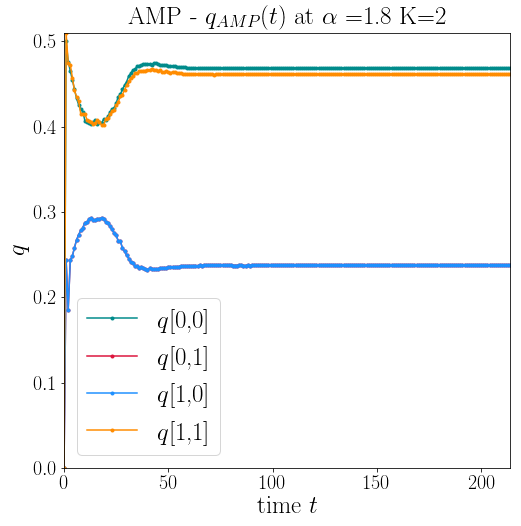

In [9]:
plot_q(obj_AMP)

#### 3. AMP generalization error (over N_samples_gen_error new samples)

In [7]:
## Compute the corresponding Generalization Error
N_samples_gen_error = 10000
run_gen_error_AMP(obj_AMP,K,PW_choice,N,alpha,N_samples_gen_error)

Start Gen Error
0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
End Gen Error
Gen Error= [0.13446551]


## SE

#### 1. Run SE (initialization with backup to speed up)

In [8]:
obj_SE= run_SE(K,PW_choice,alpha)

Channel: sign-sign
y values: [-1, 0, 1]
Start initialization
alpha= 1.8
 Succeed to load old objects :  Nearest alpha= 1.8
Initialization succeed
K= 2 PW= binary alpha= 1.8 channel= sign-sign
committee_symmetry= True 

Start: Thu May 31 13:07:01 2018
Step =  0
q=
[0.45836978 0.24338863]
[0.24338863 0.45836978]
Step =  1
Time ellapsed for the step = 51.470862865448
q=
[0.45837482 0.24338418]
[0.24338418 0.45837482]
difference = 1.898206363015742e-05


Step =  2
Time ellapsed for the step = 51.704893827438354
q=
[0.45837972 0.24337986]
[0.24337986 0.45837972]
difference = 1.8427151622479876e-05


Step =  3
Time ellapsed for the step = 51.42626118659973
q=
[0.45838447 0.24337566]
[0.24337566 0.45838447]
difference = 1.7888455975945128e-05


Step =  4
Time ellapsed for the step = 51.488837242126465
q=
[0.45838908 0.24337159]
[0.24337159 0.45838908]
difference = 1.7365488489407e-05


Step =  5
Time ellapsed for the step = 51.84804677963257
q=
[0.45839355 0.24336764]
[0.24336764 0.45839355]


KeyboardInterrupt: 

#### 2. Compute SE geneealization error

In [ ]:
run_gen_error_SE(obj_SE)